## Name: Nikhil Vikas Kale
## Roll No.: 039
## Subject: LP-IV(DL)
## Experiment No.02


In [3]:
pip install tensorflow

     -------------------------------------- 455.9/455.9 MB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 4.3 MB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 kB 4.0 MB/s eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 438.7/438.7 kB 3.4 MB/s eta 0:00:00
     -------------------------------------- 781.

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, Flatten
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
mnist = tf.keras.datasets.mnist
(x_train, y_train) , (x_test, y_test) = mnist.load_data() # Data loading
x_train, x_test = x_train/255.0 , x_test/255.0 #Normalizing the data

11490434/11490434 [==============================] - 17s 2us/step


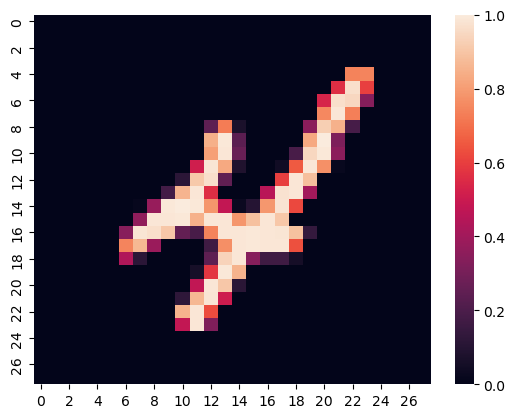

In [6]:
sns.heatmap(x_train[9])
plt.show()

In [7]:
model = Sequential([
Flatten(input_shape=(28,28)),
Dense(128, activation="relu"),
Dropout(0.2),
Dense(10)
])

In [8]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.9043044 , -0.32592076,  0.3170731 , -1.0282385 , -0.41045415,
         0.28836071,  0.12233084, -0.61074746,  0.51145774, -0.31079957]],
      dtype=float32)

In [9]:
tf.nn.softmax(predictions).numpy()


array([[0.04533973, 0.08084773, 0.15378588, 0.04005485, 0.07429428,
        0.1494331 , 0.12657298, 0.06080917, 0.1867827 , 0.08207953]],
      dtype=float32)

In [10]:
loss_fn =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


In [11]:
model.compile(optimizer="adam", loss = loss_fn, metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2963 - accuracy: 0.9136
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1425 - accuracy: 0.9582
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1076 - accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0865 - accuracy: 0.9737
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0762 - accuracy: 0.9761


In [12]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0753 - accuracy: 0.9769 - 633ms/epoch - 2ms/step


[0.07529464364051819, 0.9768999814987183]

In [13]:
val = model.fit(x_train, y_train, epochs=6, validation_data=(x_test, y_test),batch_size=200)

Epoch 1/6
300/300 [==============================] - 2s 7ms/step - loss: 0.0513 - accuracy: 0.9841 - val_loss: 0.0661 - val_accuracy: 0.9799
Epoch 2/6
300/300 [==============================] - 2s 6ms/step - loss: 0.0482 - accuracy: 0.9848 - val_loss: 0.0633 - val_accuracy: 0.9803
Epoch 3/6
300/300 [==============================] - 2s 6ms/step - loss: 0.0437 - accuracy: 0.9868 - val_loss: 0.0630 - val_accuracy: 0.9809
Epoch 4/6
300/300 [==============================] - 2s 6ms/step - loss: 0.0416 - accuracy: 0.9872 - val_loss: 0.0620 - val_accuracy: 0.9812
Epoch 5/6
300/300 [==============================] - 2s 6ms/step - loss: 0.0410 - accuracy: 0.9878 - val_loss: 0.0637 - val_accuracy: 0.9811
Epoch 6/6
300/300 [==============================] - 2s 6ms/step - loss: 0.0386 - accuracy: 0.9884 - val_loss: 0.0618 - val_accuracy: 0.9808


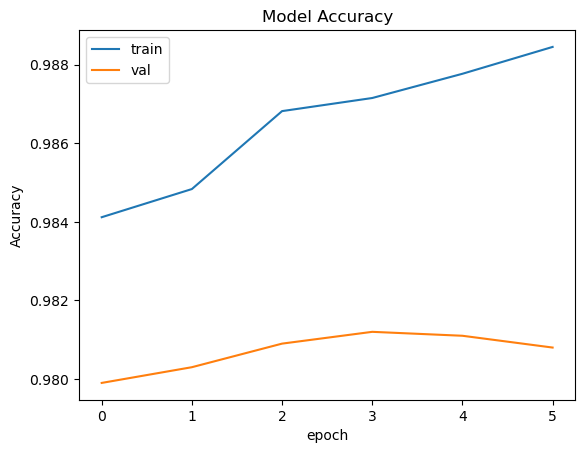

In [14]:
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.plot(val.history["accuracy"])
plt.plot(val.history["val_accuracy"])
plt.legend(["train","val"])
plt.show()